## Data Forecasting

**Objective:**
Utilize the ARIMA model to Compute Daily Total Quantities.

### 1. Load Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# Or, only disable specific warnings based on category
# Example: Disabling DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
df = pd.read_csv('C:/Users/hp/Downloads/PortoBuilder/Kalbe Internship/Final Project/Case Study Data Scientist/merged_data.csv')

In [6]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR10008,235,2022-05-21,P8,16000,2,32000,4,Oat,16000,Gita Ginara,Gita,General Trade,6966667.0,110416664.0,37,0,Married,"5,35"
1,TR32057,235,2022-06-10,P7,9400,3,28200,7,Coffee Candy,9400,Buana Indah,Buana,General Trade,3316694.0,114590111.0,37,0,Married,"5,35"
2,TR47938,235,2022-10-18,P3,7500,4,30000,7,Crackers,7500,Buana Indah,Buana,General Trade,3316694.0,114590111.0,37,0,Married,"5,35"
3,TR49065,235,2022-10-08,P5,4200,4,16800,7,Thai Tea,4200,Buana Indah,Buana,General Trade,3316694.0,114590111.0,37,0,Married,"5,35"
4,TR50919,235,2022-08-18,P7,9400,4,37600,7,Coffee Candy,9400,Buana Indah,Buana,General Trade,3316694.0,114590111.0,37,0,Married,"5,35"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   4908 non-null   object 
 1   CustomerID      4908 non-null   int64  
 2   Date            4908 non-null   object 
 3   ProductID       4908 non-null   object 
 4   Price_x         4908 non-null   int64  
 5   Qty             4908 non-null   int64  
 6   TotalAmount     4908 non-null   int64  
 7   StoreID         4908 non-null   int64  
 8   Product Name    4908 non-null   object 
 9   Price_y         4908 non-null   int64  
 10  StoreName       4908 non-null   object 
 11  GroupStore      4908 non-null   object 
 12  Type            4908 non-null   object 
 13  Latitude        4908 non-null   float64
 14  Longitude       4908 non-null   float64
 15  Age             4908 non-null   int64  
 16  Gender          4908 non-null   int64  
 17  Marital Status  4908 non-null   o

### 2. Calculate Total Quantity per day

In [10]:
df_totalquantity = df.groupby('Date')["Qty"].sum().reset_index()

In [11]:
df_totalquantity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Qty     365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [12]:
df_totalquantity.set_index('Date', inplace=True)

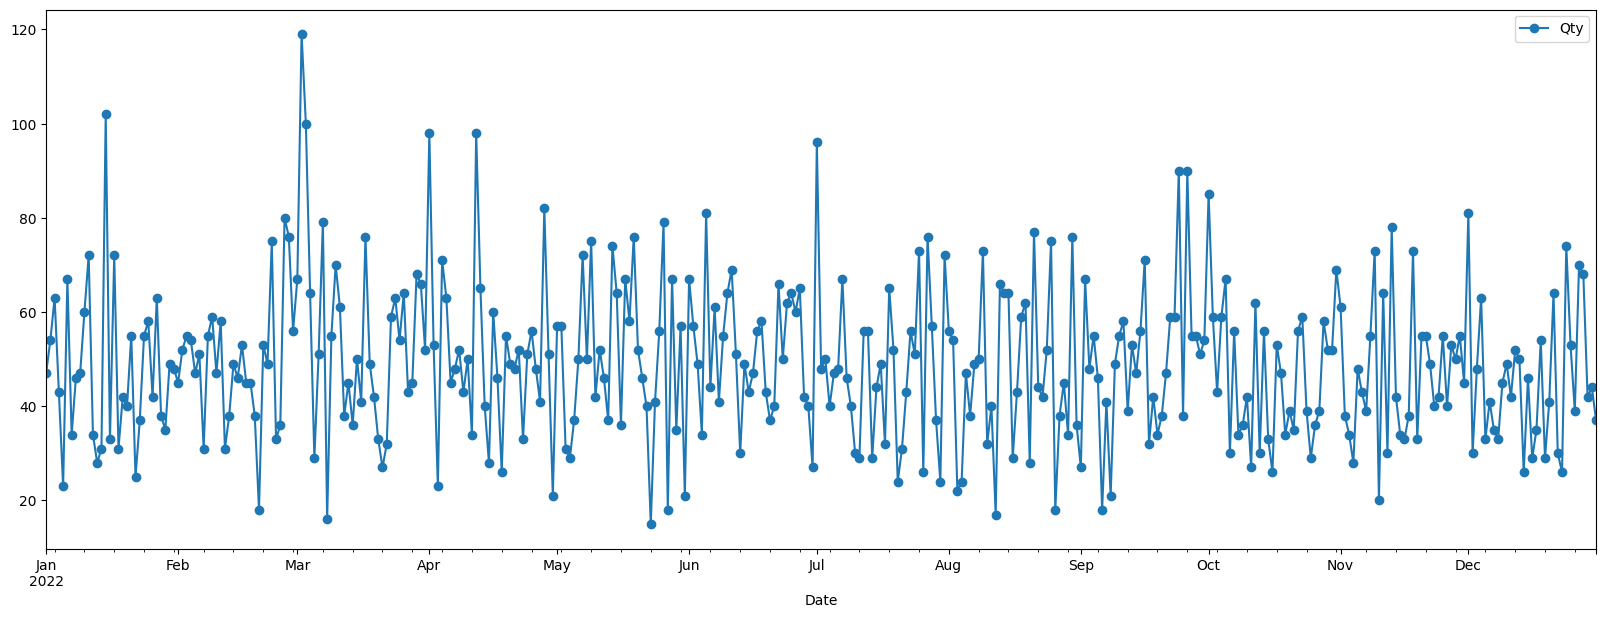

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7
df_totalquantity.plot(marker='o')
plt.show()

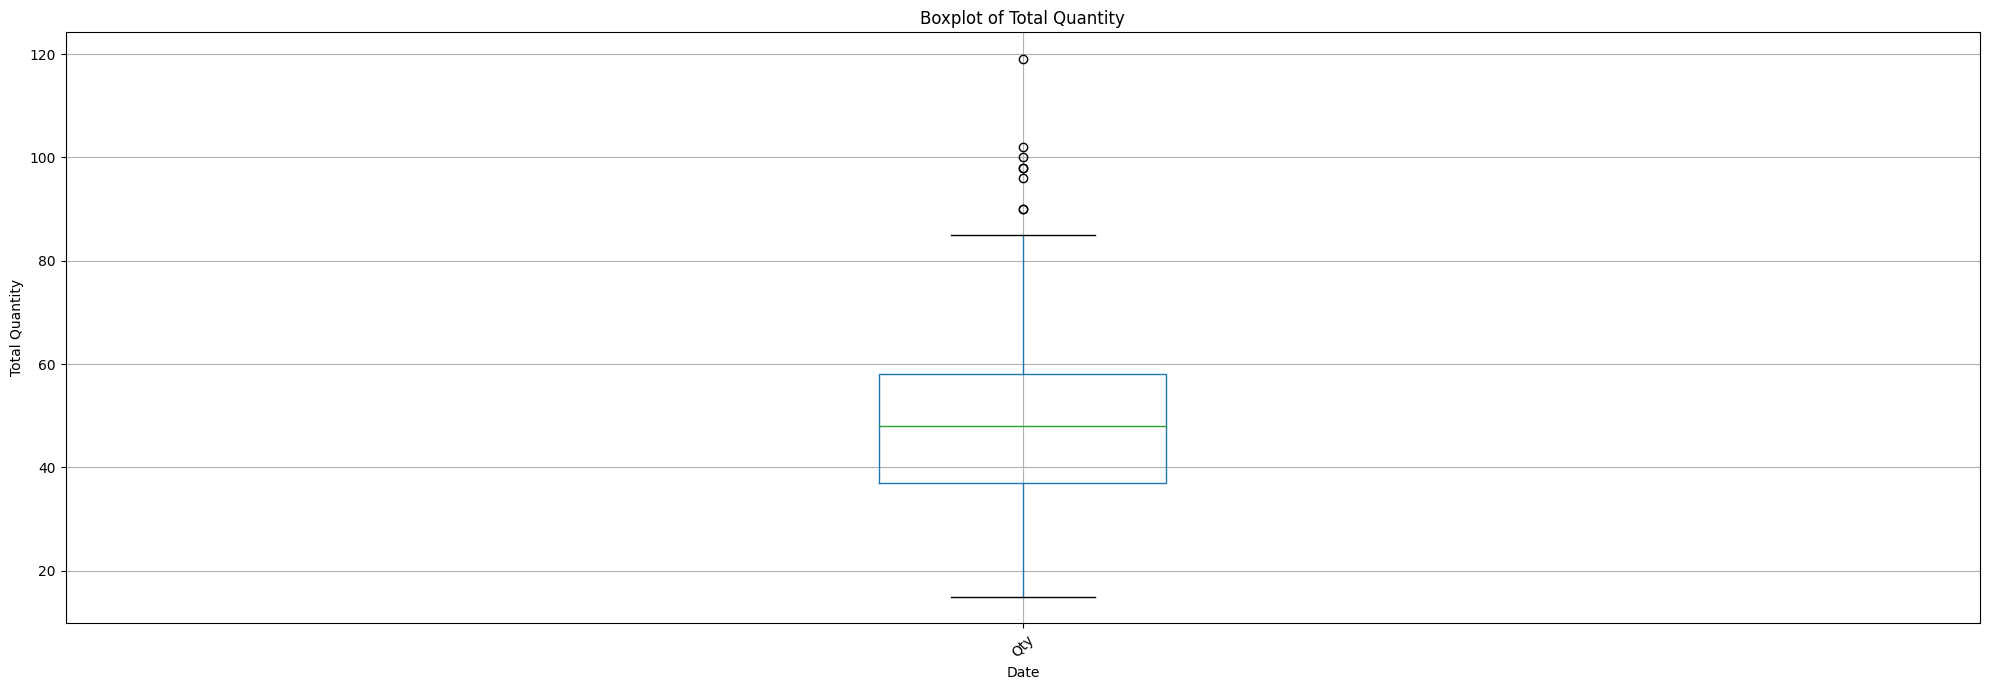

In [14]:
# Assuming df_totalquantity is your DataFrame with 'Date' as the index
df_totalquantity.boxplot()
plt.title('Boxplot of Total Quantity')
plt.ylabel('Total Quantity')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Stationary Test

In [16]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [17]:
adfuller_test(df_totalquantity['Qty'])

ADF Test Statistic : -19.425974569865648
p-value : 0.0
#Lags Used : 0
Number of Observations : 364
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


### 4. Choosing best p, d, and q parameter for ARIMA model using Grid Search or Auto Prima

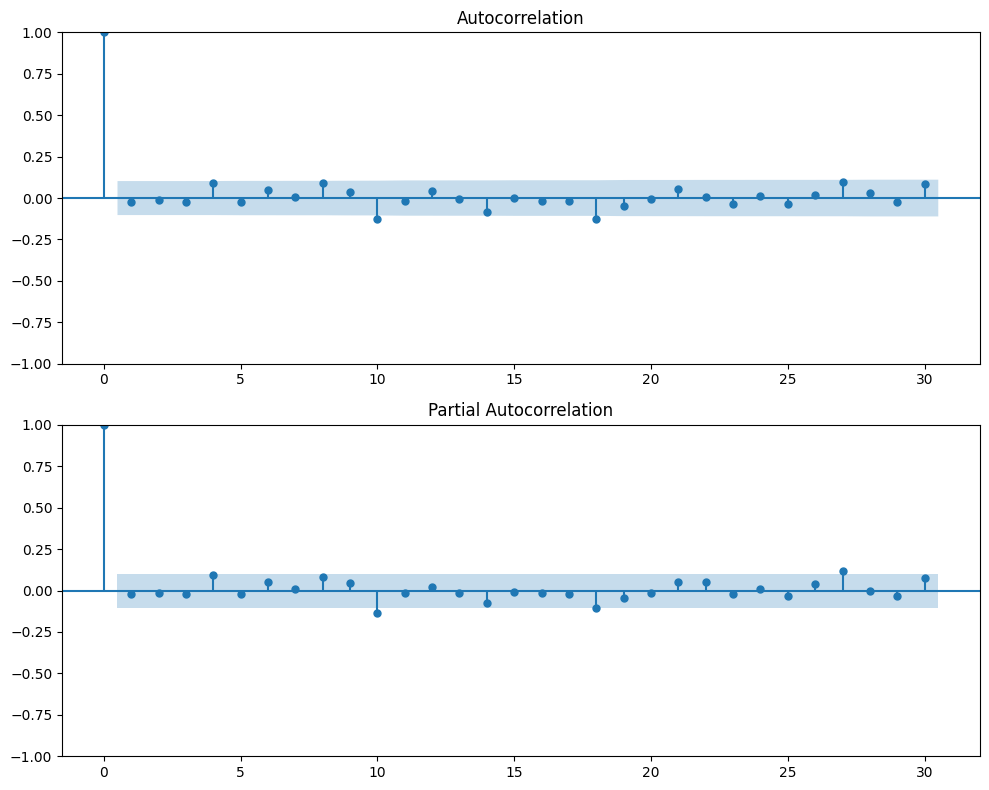

In [18]:
# Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df_totalquantity['Qty'], lags=30, ax=ax1)
plot_pacf(df_totalquantity['Qty'], lags=30, ax=ax2)

plt.tight_layout()
plt.show()

In [19]:
aic_scores = []
# Fit the ARIMA model
model = ARIMA(df_totalquantity['Qty'], order=(4,0,4))
model_fit = model.fit()
# Add AIC score to the list
aic_scores.append({'par': '(4,0,4)', 'aic': model_fit.aic})

In [20]:
aic_scores

[{'par': '(4,0,4)', 'aic': 3088.3745848623453}]

#### A. Grid search hyperparameter tuning

In [21]:
from itertools import product

# Define ranges for p, d, and q
p = range(0, 5)  # 0 to 7
d = range(0, 3)  # 0 to 2
q = range(0, 5)  # 0 to 7

# Use the product function from itertools
# to create combinations of p, d, and q
pdq = list(product(p, d, q))
print(pdq)


[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 2, 0), (4, 2, 1), (4, 2, 2), (4, 2, 3), (4, 2, 4)]


Manual grid search to find the optimal combination of parameters (p, d, q) for an ARIMA model based on the lowest AIC score.

In [36]:
# Splitting data into training and testing with ratio 8 : 2
data_train = df_totalquantity[:292]["Qty"]
data_test = df_totalquantity[292:]['Qty']

# Creating a list to store AIC scores
aic_scores = []

# Performing manual grid search to find optimal p, d, q
for param in pdq:
    # Fitting the ARIMA model
    model = ARIMA(data_train, order=param)
    model_fit = model.fit()
    # Adding AIC score to the list
    aic_scores.append({'par': param, 'aic': model_fit.aic})

# Finding the smallest AIC score
best_aic = min(aic_scores, key=lambda x: x['aic'])

print(best_aic)

# Creating an ARIMA model with the best p, d, and q from grid search
model = ARIMA(data_train, order=(best_aic['par']))
model_fit = model.fit()

# Making predictions for the next 73 days (testing data)
preds = model_fit.forecast(73)

{'par': (2, 1, 3), 'aic': 2476.234879038854}


<Axes: >

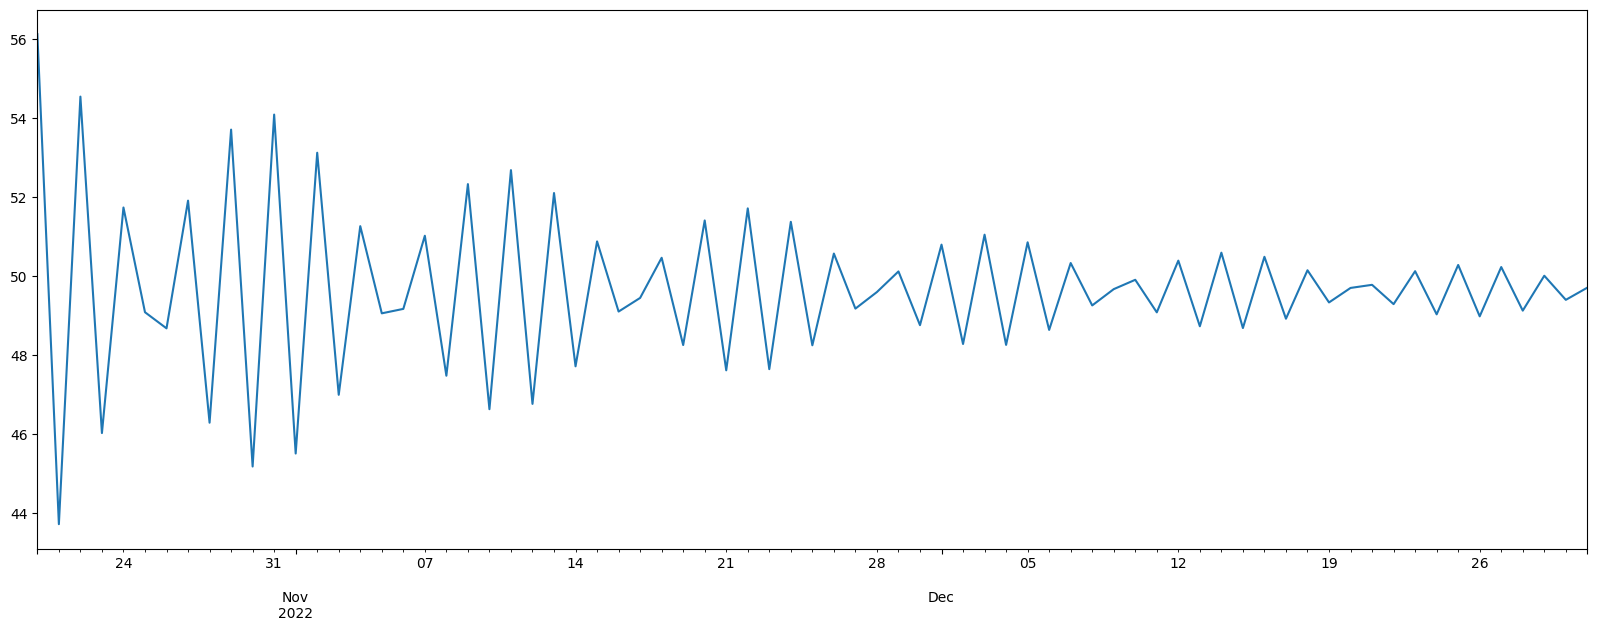

In [31]:
preds.plot()

#### B. Autoarima

In [37]:
import pmdarima as pm

auto_arima = pm.auto_arima(data_train,stepwise=False, seasonal=False)
forecast = auto_arima.predict(n_periods=73)

auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -1285.661
Date:                Sun, 29 Oct 2023   AIC                           2579.321
Time:                        03:19:53   BIC                           2594.028
Sample:                    01-01-2022   HQIC                          2585.212
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3361      0.057      5.845      0.000       0.223       0.449
ar.L2          0.3237      0.060      5.351      0.000       0.205       0.442
ar.L3          0.3004      0.054      5.526      0.000       0.194       0.407
sigma2       387.5657     29.419     13.174      0.000     329.906     445.225
===================================================================================
Ljung-Box (L1) (Q):                   3.91   Jarque-Bera (JB):                 3.16
Prob(Q):                              0.05   Prob(JB):                         0.21
Heteroskedasticity (H):               0.85   Skew:                             0.19
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

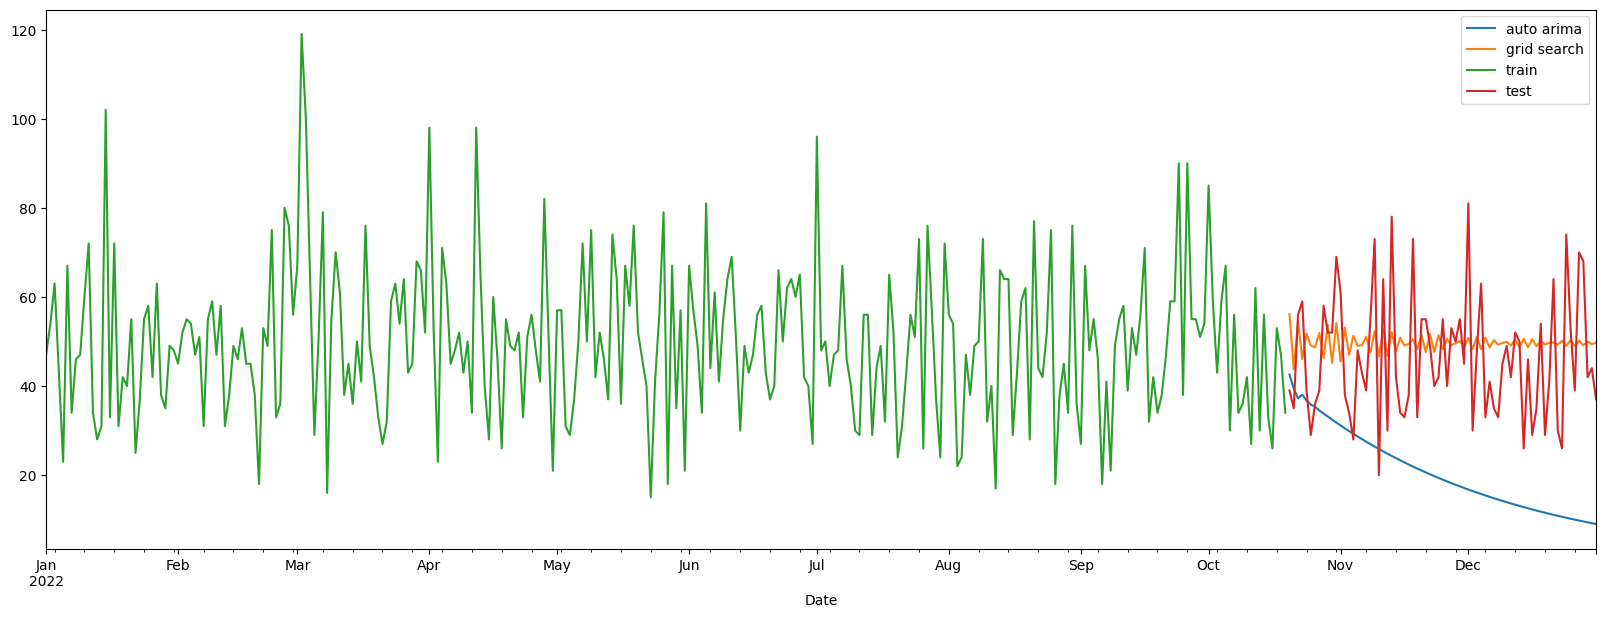

In [38]:
# ploting
forecast.plot(label='auto arima')
preds.plot(label='grid search')

data_train.plot(label='train')
data_test.plot(label='test')
plt.legend()

**Grid search** is the preferred method for selecting optimal ARIMA model parameters in this context, offering precise customization within the specific case constraints."

### 5. Evaluate model

In [39]:
# Calculate RMSE for training data
train_predictions = model_fit.predict(start=data_train.index[0], end=data_train.index[-1])
train_rmse = np.sqrt(mean_squared_error(data_train, train_predictions))

# Calculate RMSE for testing data
test_rmse = np.sqrt(mean_squared_error(data_test, preds))

print(f"RMSE for Training Data: {train_rmse:.2f}")
print(f"RMSE for Testing Data: {test_rmse:.2f}")

RMSE for Training Data: 16.89
RMSE for Testing Data: 14.07


<Axes: xlabel='Date'>

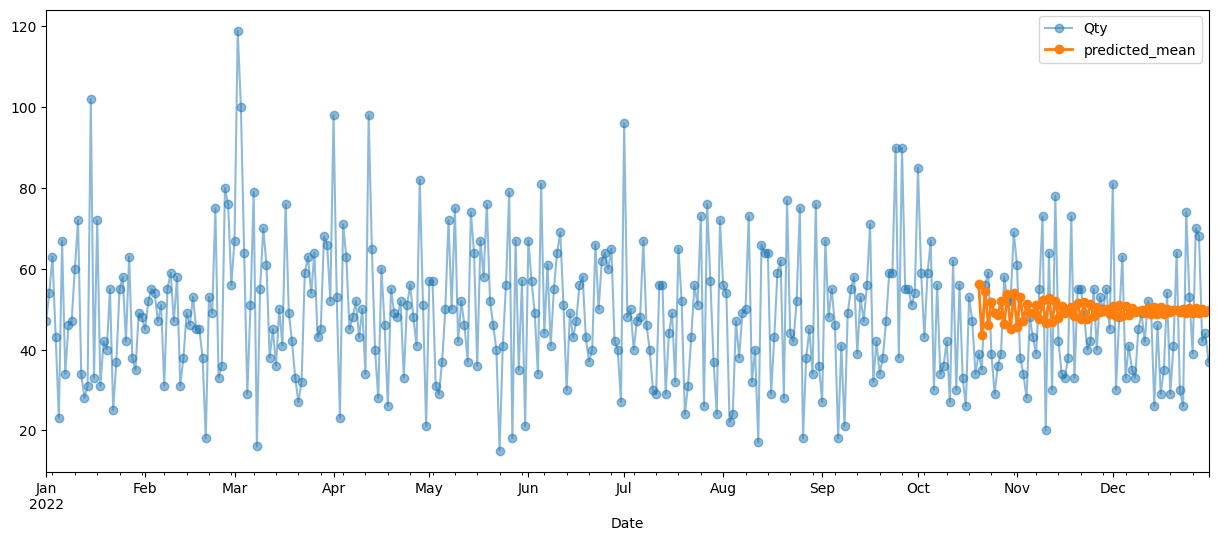

In [40]:
df_totalquantity.plot(figsize=(15, 6), alpha=0.5, marker="o")
preds.plot(linewidth=2, marker="o", legend=True)

The RMSE values for training (16.89) and testing (14.07) indicate a well-fitted model (p=2, d=1, q=3). The minimal difference suggests good generalization to new data, signifying **no significant overfitting**.

### 6. Forecasting 30 days using p = 2, d = 1 and q=3

<Axes: >

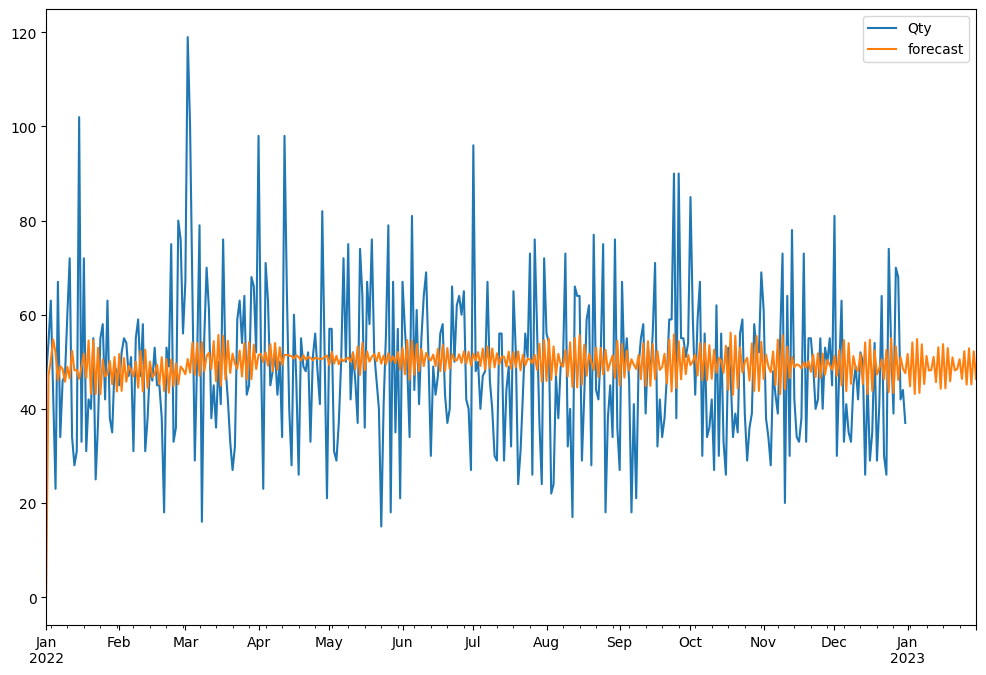

In [41]:
from pandas.tseries.offsets import DateOffset

future_dates=[df_totalquantity.index[-1]+ DateOffset(days=x)for x in range(0,31)]
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df_totalquantity.columns)

future_df = pd.concat([df_totalquantity,future_dates_df])

model=ARIMA(df_totalquantity['Qty'], order=(2,1,3))
model_fit=model.fit()

future_df['forecast'] = model_fit.predict(start = 0, end = 395, dynamic = False)
future_df[['Qty', 'forecast']].plot(figsize=(12, 8))

In [42]:
future_df.tail(30).mean()

Qty               NaN
forecast    48.936261
dtype: object

### 7. Saving Model

In [44]:
import pickle

# Creating an ARIMA model with the best p, d, and q from grid search
model = ARIMA(df_totalquantity['Qty'], order=best_aic['par'])
model_fit = model.fit()

# Save the model to a file using pickle
model_filename = 'arima_model.pkl'
with open('C:/Users/hp/Downloads/PortoBuilder/Kalbe Internship/Final Project/Case Study Data Scientist' + model_filename, 'wb') as model_file:
    pickle.dump(model_fit, model_file)

print("Model saved successfully!")

Model saved successfully!


In [48]:
import pickle
# Load the ARIMA model from the file
model_filename = 'arima_model.pkl'
with open('C:/Users/hp/Downloads/PortoBuilder/Kalbe Internship/Final Project/Case Study Data Scientist' + model_filename, 'rb') as model_file:
    loaded_model_fit = pickle.load(model_file)

# Number of days for prediction
num_days = 30

# Forecast the next 30 days
forecast = loaded_model_fit.forecast(steps=num_days)

print("Forecasted quantities for the next", num_days, "days:")
print(forecast)

average_quantity_forecast = forecast.mean()
print("Average quantity forecast for the next", num_days, "days:", average_quantity_forecast)

Forecasted quantities for the next 30 days:
2023-01-01    51.673515
2023-01-02    44.794801
2023-01-03    54.122361
2023-01-04    43.166051
2023-01-05    54.833037
2023-01-06    43.395892
2023-01-07    53.714793
2023-01-08    45.282662
2023-01-09    51.235287
2023-01-10    48.139010
2023-01-11    48.239709
2023-01-12    51.033902
2023-01-13    45.668830
2023-01-14    53.090942
2023-01-15    44.268287
2023-01-16    53.748973
2023-01-17    44.377446
2023-01-18    52.908992
2023-01-19    45.855901
2023-01-20    50.931126
2023-01-21    48.160000
2023-01-22    48.493273
2023-01-23    50.535618
2023-01-24    46.363896
2023-01-25    52.260723
2023-01-26    45.163665
2023-01-27    52.861001
2023-01-28    45.188660
2023-01-29    52.235358
2023-01-30    46.344125
Freq: D, Name: predicted_mean, dtype: float64
Average quantity forecast for the next 30 days: 48.93626118782763


<Axes: >

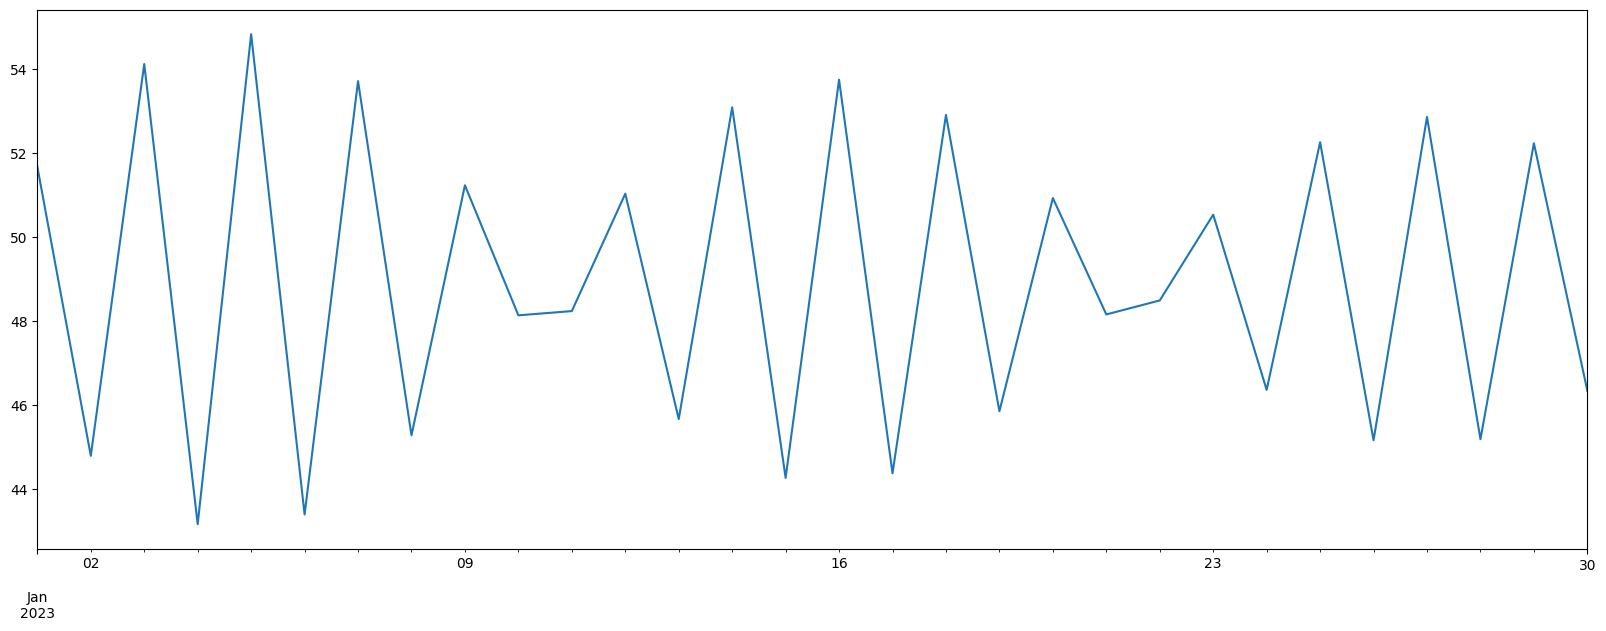

In [47]:
forecast.plot()

### Conclusion
1. Average quantity forecast for the next 30 days: 49
2. ARIMA parameters, p=2, d=1, and q=3, are configured.
3. Training RMSE is 17.41, while testing RMSE stands at 13.47.
4. No overfitting observed: the model shows a balanced fit.
5. Considering other time series algorithms for exploration.

In [1]:

import nbformat

def ipynb_to_py(input_notebook, output_script):
    with open(input_notebook, 'r', encoding='utf-8') as nb_file:
        notebook = nbformat.read(nb_file, as_version=4)
    
    code_cells = []
    for cell in notebook.cells:
        if cell.cell_type == 'code':
            code_cells.append(cell.source)
    
    with open(output_script, 'w', encoding='utf-8') as py_file:
        py_file.write('\n'.join(code_cells))

# Replace 'input_notebook.ipynb' with the name of your input Jupyter Notebook file
# Replace 'output_script.py' with the desired name for the output Python script file
input_notebook = 'DataForecasting_Kalbe_Ricky.ipynb'
output_script = 'DataForecasting_Kalbe_Ricky.py'

ipynb_to_py(input_notebook, output_script)
